# Breast Cancer Diagnosis

 Importing libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('C:\\Users\\DM\\Downloads\\cancer.csv')

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [7]:
#Here 'M','B' represents malignant and benign.
#both are two type of tumers.
#Benign tumors tend to grow slowly and do not spread. 
#Malignant tumors can grow rapidly, invade and destroy nearby normal tissues, and spread throughout the body.
#benign is noncancerous and malignant is cancerous

#machine learning models can not deal with categorical data set as string.
#so we will relplce 'M'(cancerous) as 1 and 'B' as '0'.

In [8]:
df['diagnosis'].replace(['M','B'],[1,0], inplace=True)

# EDA & Visualization

In [9]:
#exploring the dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [12]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


Visualization Tasks

Creating a bar plot that shows the total counts per target values.

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

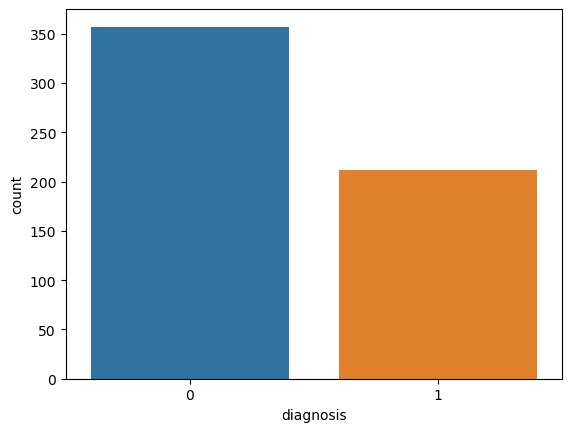

In [15]:
sns.countplot(x='diagnosis',data=df)

from this graph we can see that there is a more number of bengin(noncancers) tumor detected than malignant

Correlation Matrix (heatmap style)

<AxesSubplot:>

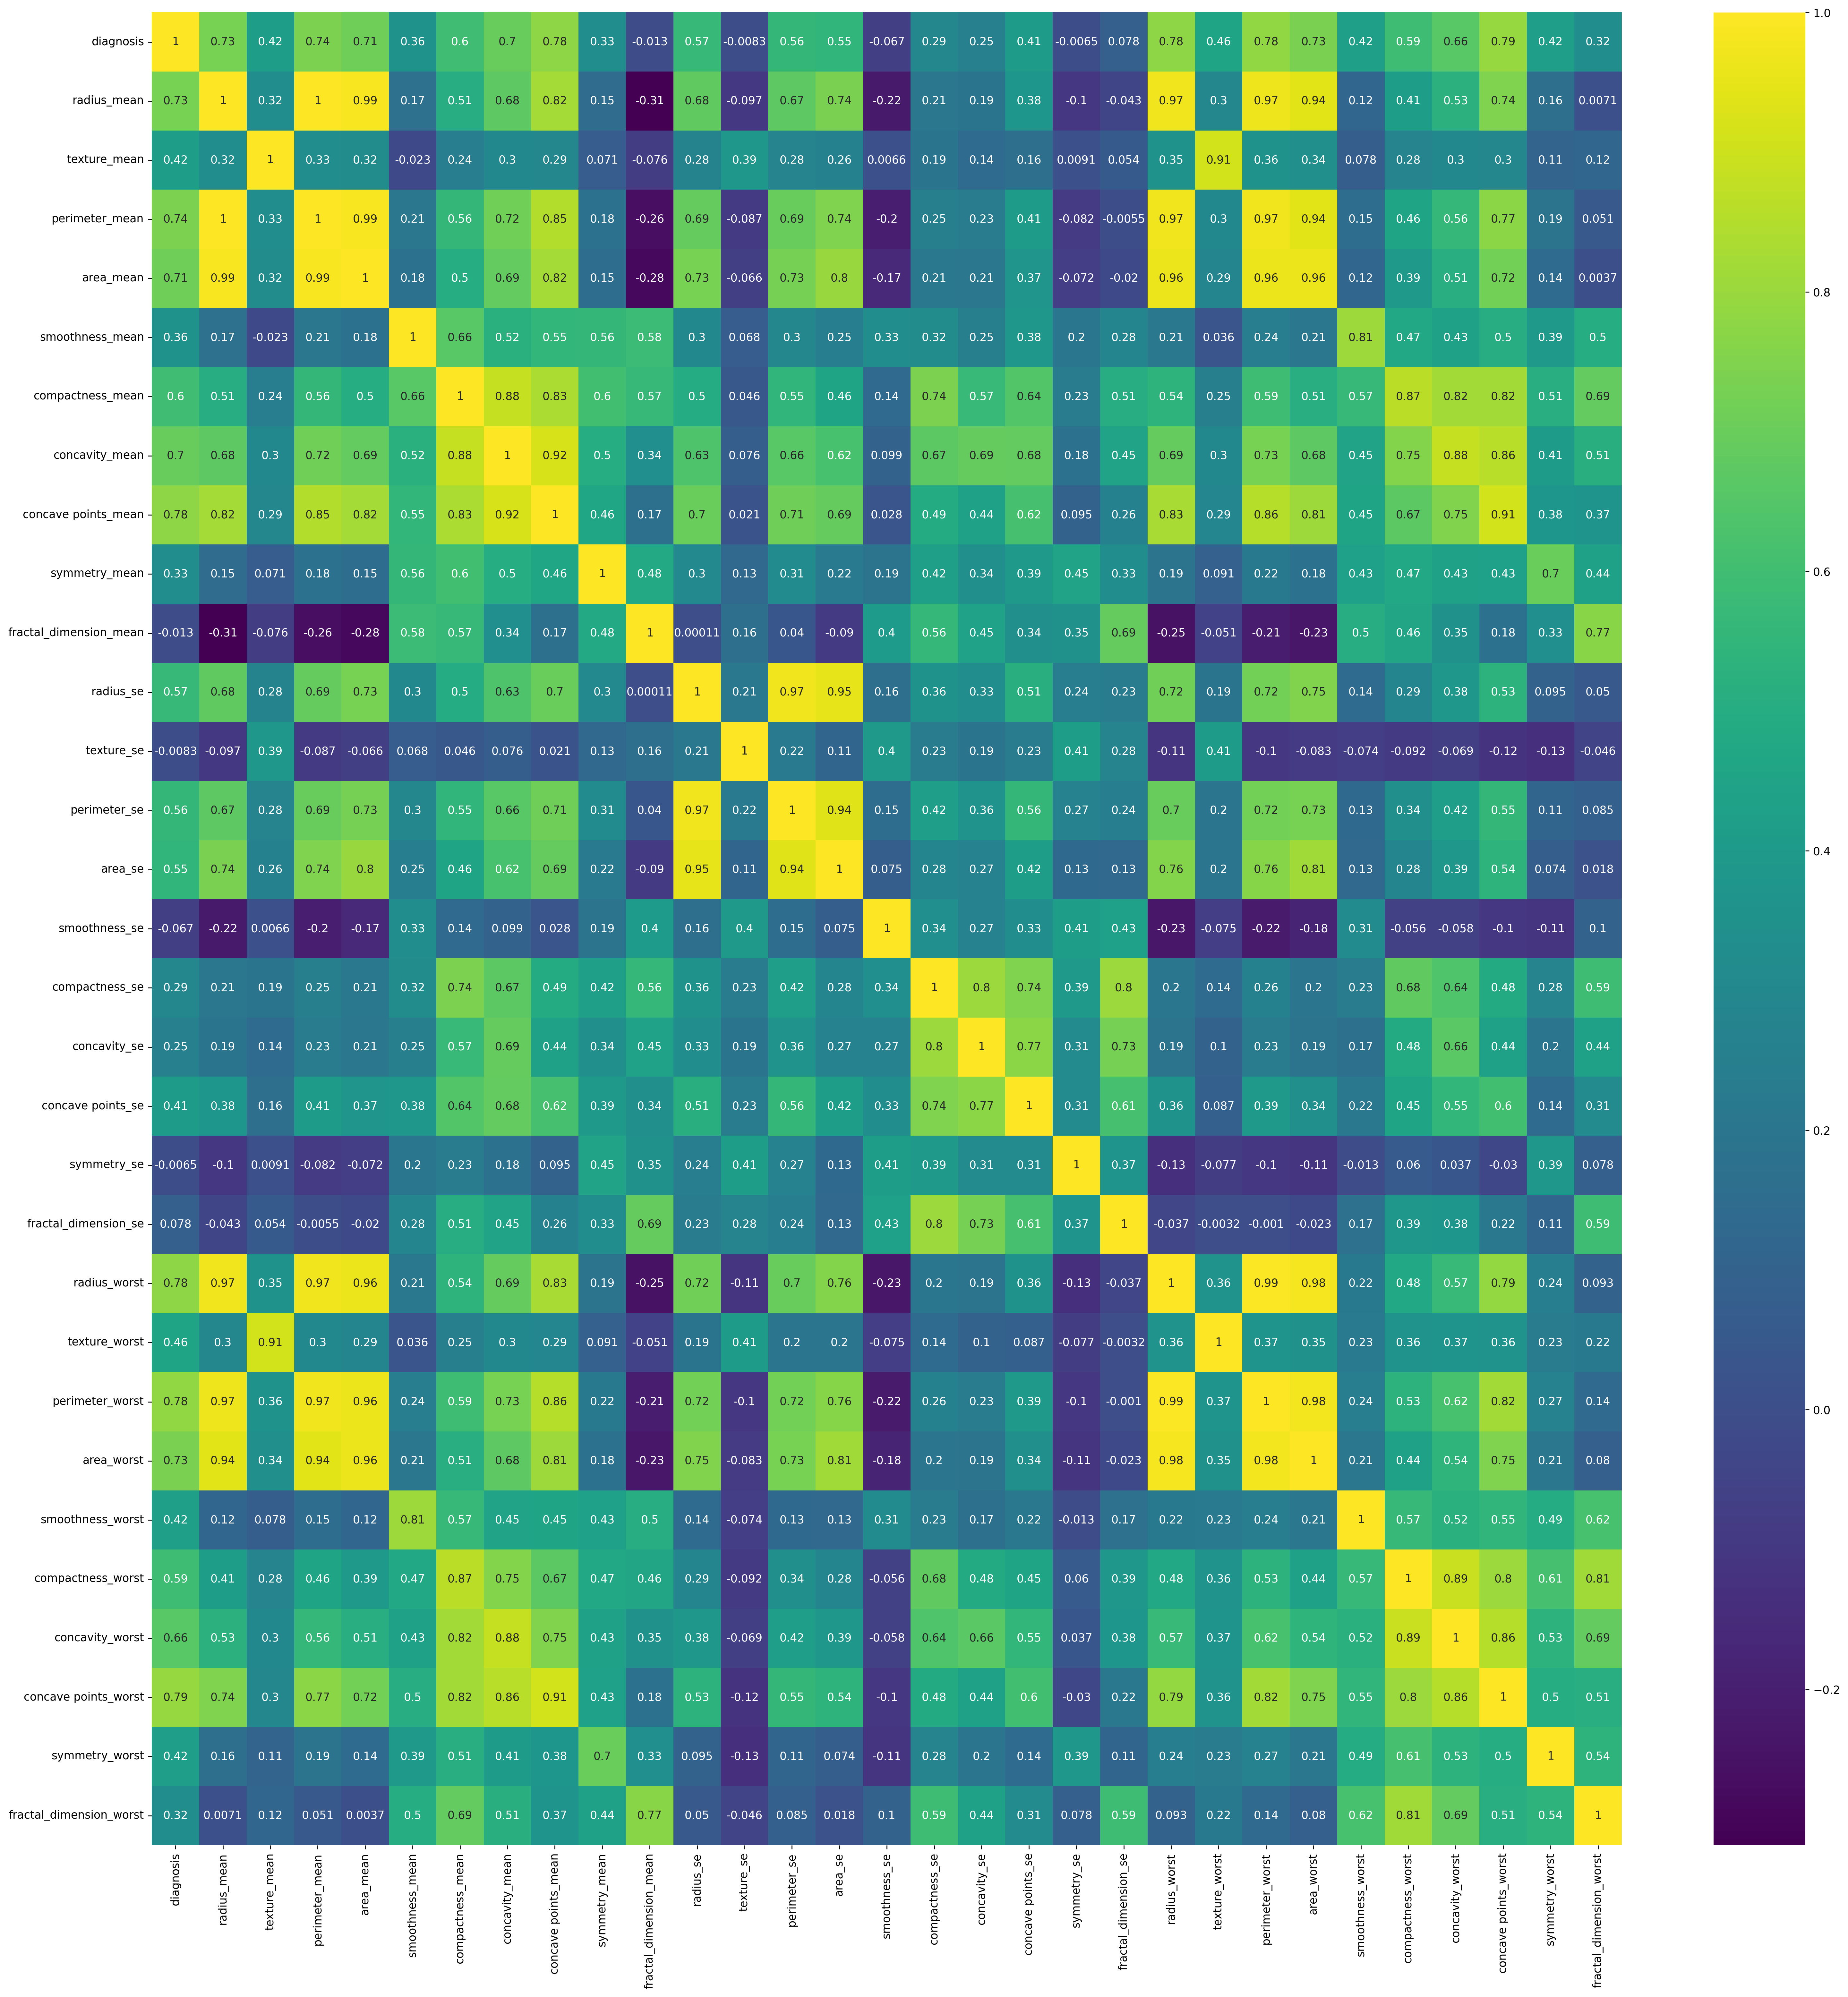

In [16]:
plt.figure(figsize=(25,25),dpi=250,tight_layout=True)
sns.heatmap(df.corr(),annot=True,cmap='viridis' )

'concave points_worst', 'perimeter_worst' and 'radius_worst' are strongly correlated with 'diagnosis '

In [17]:
#cancerous tumor  correlation
cancerous = df.corr()['diagnosis'].sort_values(ascending=False).round(2)

In [18]:
cancerous

diagnosis                  1.00
concave points_worst       0.79
perimeter_worst            0.78
concave points_mean        0.78
radius_worst               0.78
perimeter_mean             0.74
area_worst                 0.73
radius_mean                0.73
area_mean                  0.71
concavity_mean             0.70
concavity_worst            0.66
compactness_mean           0.60
compactness_worst          0.59
radius_se                  0.57
perimeter_se               0.56
area_se                    0.55
texture_worst              0.46
smoothness_worst           0.42
symmetry_worst             0.42
texture_mean               0.42
concave points_se          0.41
smoothness_mean            0.36
symmetry_mean              0.33
fractal_dimension_worst    0.32
compactness_se             0.29
concavity_se               0.25
fractal_dimension_se       0.08
symmetry_se               -0.01
texture_se                -0.01
fractal_dimension_mean    -0.01
smoothness_se             -0.07
Name: di

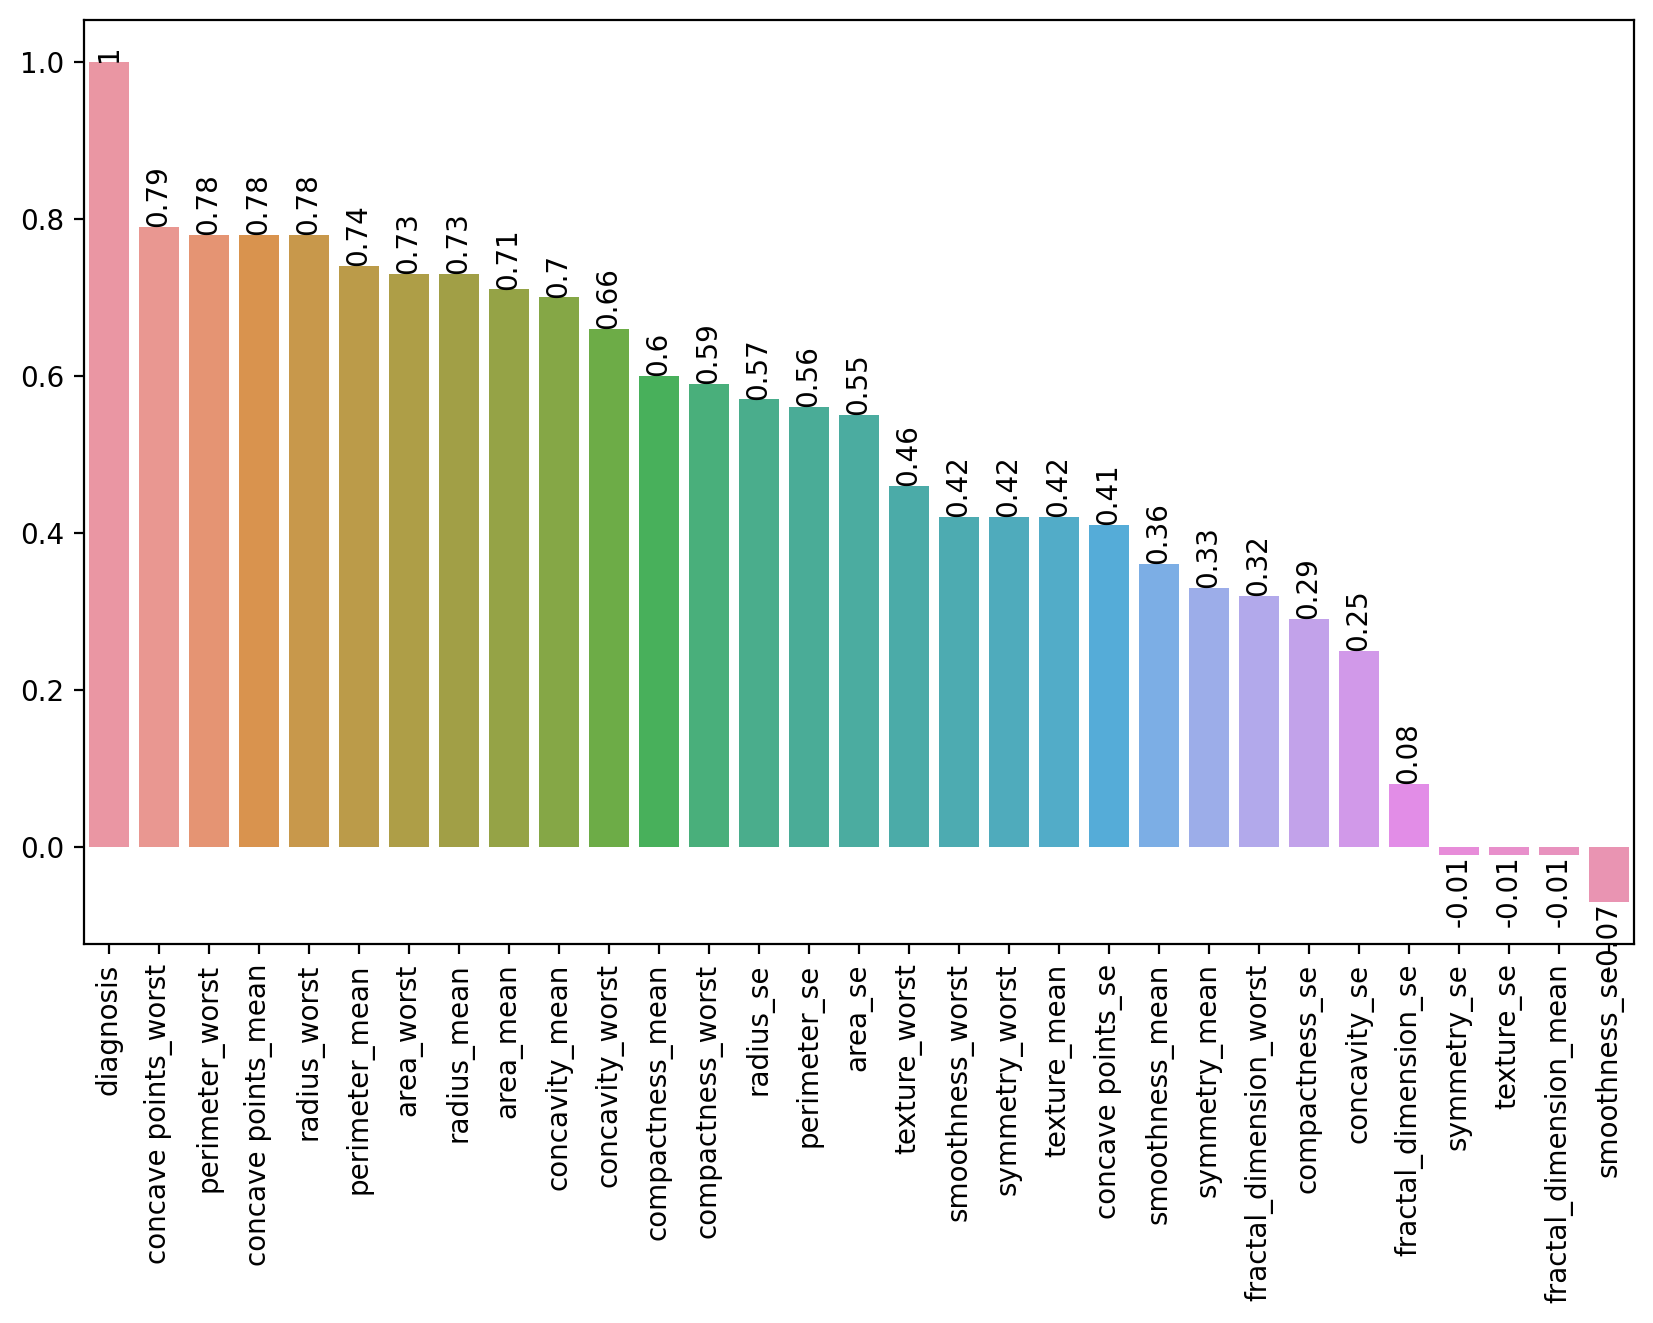

In [32]:
#cancerous tumor correlation bar plot
plt.figure(figsize=(10,6),dpi=200)
ax = sns.barplot(x=cancerous.index,y=cancerous.values)
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0],rotation=90)
plt.show()

# MACHINE LEARNING

Train | Test Split and Scaling

Separating the features from the labels into 2 objects, X and y.

In [33]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

Performing a train test split on the data, with the test size of 30% and a random_state of 101.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.3 , random_state = 100)

In [36]:
scaler = StandardScaler()


In [37]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# LOGISTIC REGRESSION

In [38]:
from sklearn.linear_model import LogisticRegressionCV

In [39]:
log_model = LogisticRegressionCV()

In [40]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

Model parameters

In [41]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [42]:
log_model.C_

array([0.35938137])

Coeffeciants

The model's coefficients.

In [43]:
log_model.coef_

array([[ 0.35520979,  0.50491355,  0.35204964,  0.36806374,  0.2456467 ,
        -0.16607187,  0.51518042,  0.58926589, -0.00691565, -0.29188899,
         0.78075287,  0.07450602,  0.55567587,  0.59187614,  0.13303054,
        -0.60326308, -0.10974701,  0.3775438 , -0.06542788, -0.41242738,
         0.60827272,  0.7214781 ,  0.57472193,  0.57725054,  0.60352279,
         0.08824742,  0.52777624,  0.74438853,  0.39615237,  0.27875452]])

In [44]:
coefs = pd.Series(index = X.columns , data =log_model.coef_[0])

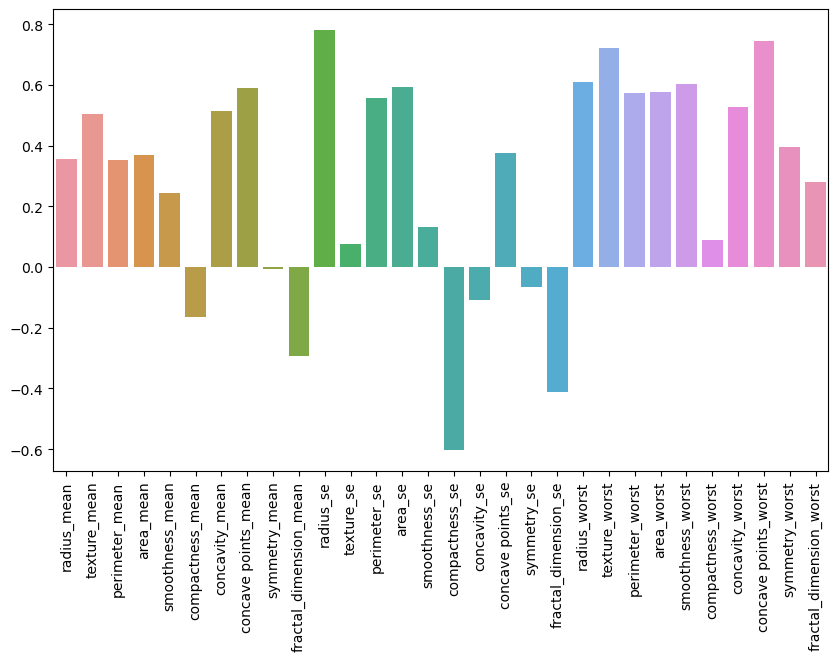

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(x=coefs.index,y=coefs.values)
plt.xticks(rotation=90);

# MODEL PERFORMANCE EVALUATION

=> Confusion Matrix Array

=> Confusion Matrix Plot

=> Classification Report

In [47]:
from sklearn.metrics import confusion_matrix , classification_report,plot_confusion_matrix

In [48]:
y_pred = log_model.predict(scaled_X_test)

In [49]:
confusion_matrix(y_test,y_pred)

array([[102,   0],
       [  5,  64]], dtype=int64)

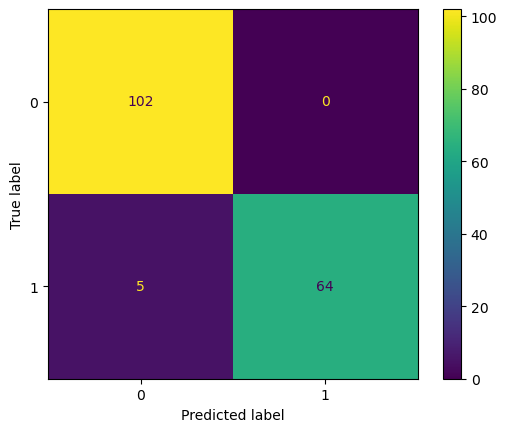

In [50]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [51]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

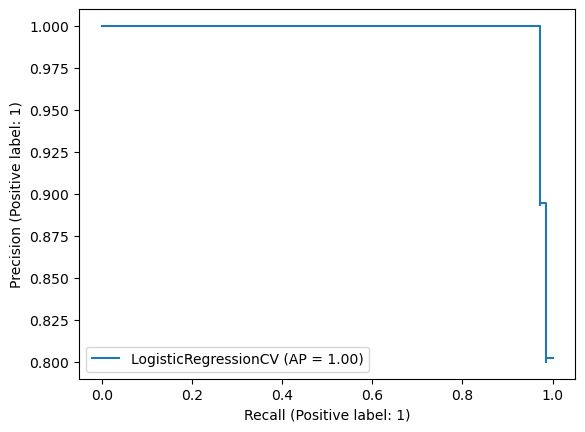

In [52]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

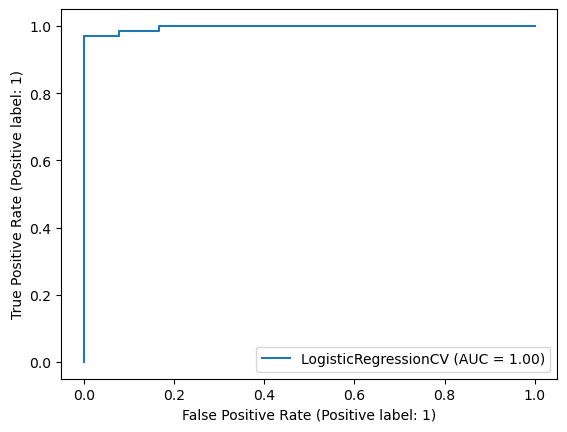

In [53]:
plot_roc_curve(log_model,scaled_X_test,y_test)

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       102
           1       1.00      0.93      0.96        69

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

